In [50]:
import pandas as pd

In [51]:
import matplotlib.pyplot as plt

In [52]:
CabDataDF = pd.read_csv('Cab_Data.csv')

In [53]:
CabDataDF

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [54]:
duplicate_ids = CabDataDF[CabDataDF.duplicated('Transaction ID')]

In [55]:
if duplicate_ids.empty:
    print("No duplicate Transaction IDs found.")

No duplicate Transaction IDs found.


In [56]:
transactionDF = pd.read_csv('Transaction_ID.csv')

In [57]:
transactionDF

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [58]:
duplicatedTransaction_ids = transactionDF[transactionDF.duplicated('Transaction ID')]

In [59]:
if duplicatedTransaction_ids.empty:
    print("No duplicate Transaction IDs found.")

No duplicate Transaction IDs found.


In [60]:
merged_df = pd.merge(CabDataDF, transactionDF, on='Transaction ID', how='outer')

In [61]:
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card
...,...,...,...,...,...,...,...,...,...
440093,10440078,NaN,NaN,NaN,NaN,NaN,NaN,51612,Cash
440094,10440091,NaN,NaN,NaN,NaN,NaN,NaN,53963,Card
440095,10440102,NaN,NaN,NaN,NaN,NaN,NaN,52526,Cash
440096,10440103,NaN,NaN,NaN,NaN,NaN,NaN,53171,Card


In [62]:
CustomerDF = pd.read_csv('Customer_ID.csv')

In [63]:
merged_df = pd.merge(merged_df,CustomerDF , on="Customer ID", how='outer')

In [64]:
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaN,NaN,NaN,NaN,NaN,NaN,23382,Card,Female,51,18919
440094,10439409,NaN,NaN,NaN,NaN,NaN,NaN,21420,Card,Female,18,4531
440095,10439413,NaN,NaN,NaN,NaN,NaN,NaN,49888,Card,Male,23,3226
440096,10439418,NaN,NaN,NaN,NaN,NaN,NaN,46456,Cash,Male,20,30662


In [65]:
rows_without_nan = merged_df[merged_df.notna().all(axis=1)]
        


In [66]:
rows_without_nan

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359886,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359887,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359888,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359889,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [67]:
type(rows_without_nan["Date of Travel"])

pandas.core.series.Series

In [68]:
rows_without_nan['Date of Travel']=pd.to_datetime(rows_without_nan['Date of Travel'])

C:\Users\furka\AppData\Local\Temp\ipykernel_24092\3465380991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_without_nan['Date of Travel']=pd.to_datetime(rows_without_nan['Date of Travel'])


In [69]:
rows_without_nan['Year'] = rows_without_nan['Date of Travel'].dt.year
rows_without_nan['Month'] = rows_without_nan['Date of Travel'].dt.month
rows_without_nan['Day'] = rows_without_nan['Date of Travel'].dt.day

C:\Users\furka\AppData\Local\Temp\ipykernel_24092\2333594512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_without_nan['Year'] = rows_without_nan['Date of Travel'].dt.year
C:\Users\furka\AppData\Local\Temp\ipykernel_24092\2333594512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_without_nan['Month'] = rows_without_nan['Date of Travel'].dt.month
C:\Users\furka\AppData\Local\Temp\ipykernel_24092\2333594512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [70]:
rows_without_nan

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,2018,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359886,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,2018,1,7
359887,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713,2018,1,3
359888,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,2018,1,4
359889,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,2018,1,6


In [71]:
df_sorted = rows_without_nan.sort_values(by='Date of Travel')

In [72]:
df_sorted

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day
4153,10000600,2016-01-02,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,3363,Cash,Male,31,23320,2016,1,2
2479,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,20687,Cash,Male,39,8926,2016,1,2
6923,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,4844,Cash,Male,32,5548,2016,1,2
15970,10001242,2016-01-02,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892,2016,1,2
3330,10000434,2016-01-02,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,59961,Card,Male,61,12377,2016,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297944,10434955,2018-12-31,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,7207,Card,Male,26,8194,2018,12,31
166841,10438162,2018-12-31,Yellow Cab,CHICAGO IL,34.72,472.05,433.3056,4263,Card,Male,36,19488,2018,12,31
185346,10434149,2018-12-31,Yellow Cab,AUSTIN TX,9.70,156.60,118.7280,35933,Card,Male,49,13189,2018,12,31
330037,10434649,2018-12-31,Yellow Cab,CHICAGO IL,24.24,344.50,340.3296,4624,Cash,Female,63,5951,2018,12,31


In [73]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [74]:
df_sorted['Season'] = df_sorted['Date of Travel'].dt.month.apply(get_season)

In [75]:
season_km_total = df_sorted.groupby('Season')['KM Travelled'].sum()


In [76]:
company_colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

In [77]:
pink_cab_df = df_sorted[df_sorted['Company'] == 'Pink Cab']

In [78]:
pink_cab_season_km = pink_cab_df.groupby('Season')['KM Travelled'].sum()


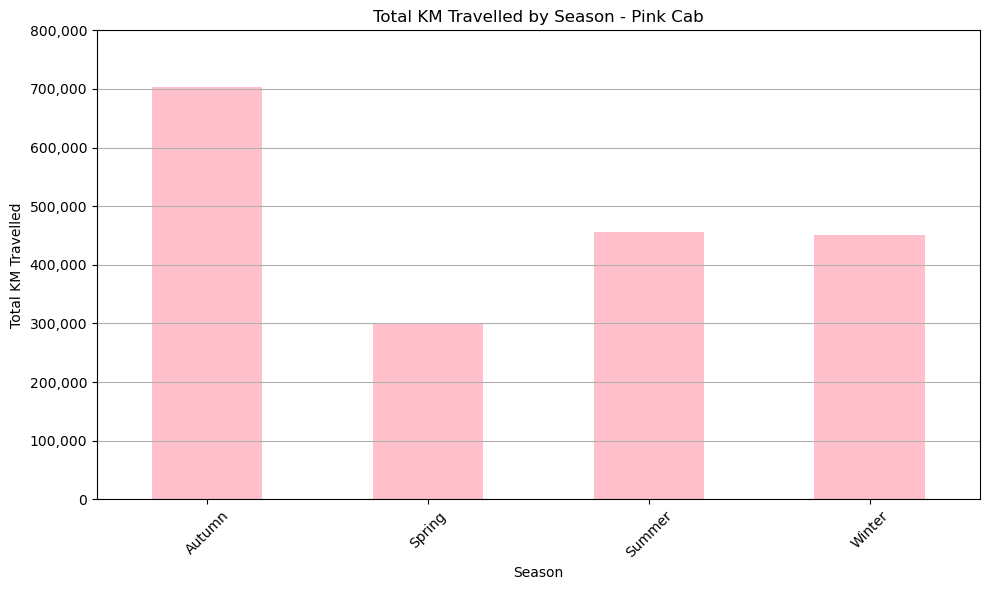

In [79]:
plt.figure(figsize=(10, 6))
pink_cab_season_km.plot(kind='bar', color='pink')
plt.title('Total KM Travelled by Season - Pink Cab')
plt.xlabel('Season')
plt.ylabel('Total KM Travelled')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(pink_cab_season_km)) + 100000, 100000), [f'{x:,.0f}' for x in range(0, int(max(pink_cab_season_km)) + 100000, 100000)])  # Set y-axis ticks to integers with comma formatting
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [80]:
yellow_cab_df = df_sorted[df_sorted['Company'] == 'Yellow Cab']

In [81]:
yellow_cab_season_km = yellow_cab_df.groupby('Season')['KM Travelled'].sum()

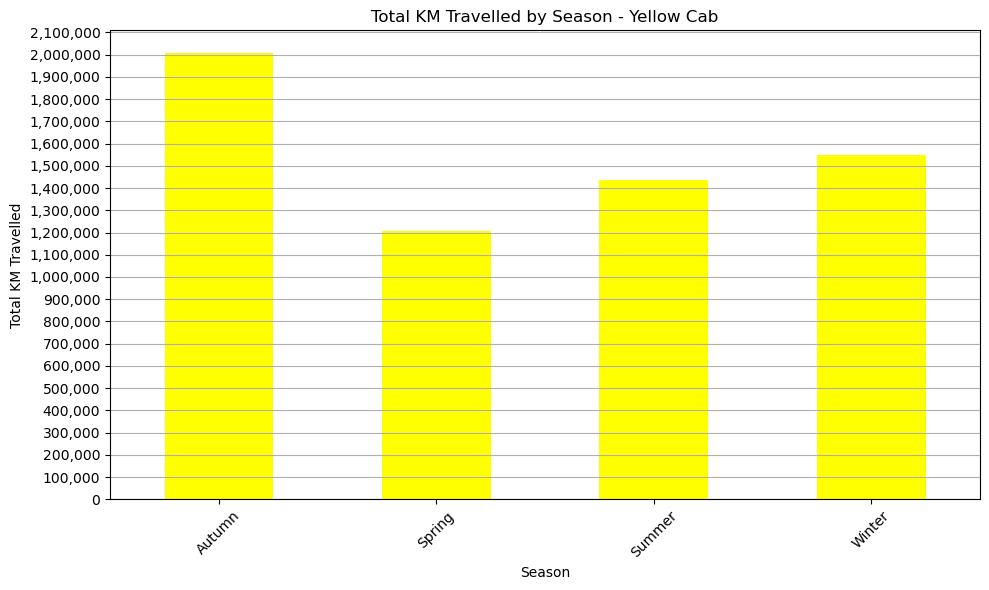

In [82]:
plt.figure(figsize=(10, 6))
yellow_cab_season_km.plot(kind='bar', color='yellow')
plt.title('Total KM Travelled by Season - Yellow Cab')
plt.xlabel('Season')
plt.ylabel('Total KM Travelled')
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(yellow_cab_season_km)) + 100000, 100000), [f'{x:,.0f}' for x in range(0, int(max(yellow_cab_season_km)) + 100000, 100000)])  # Set y-axis ticks to integers with comma formatting
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [83]:
yellow_cab_df['Profit'] = yellow_cab_df['Price Charged'] - yellow_cab_df['Cost of Trip']

C:\Users\furka\AppData\Local\Temp\ipykernel_24092\4113944236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cab_df['Profit'] = yellow_cab_df['Price Charged'] - yellow_cab_df['Cost of Trip']


In [84]:
yellow_cab_df.set_index('Date of Travel', inplace=True)

In [85]:
monthly_profit = yellow_cab_df['Profit'].resample('M').sum()

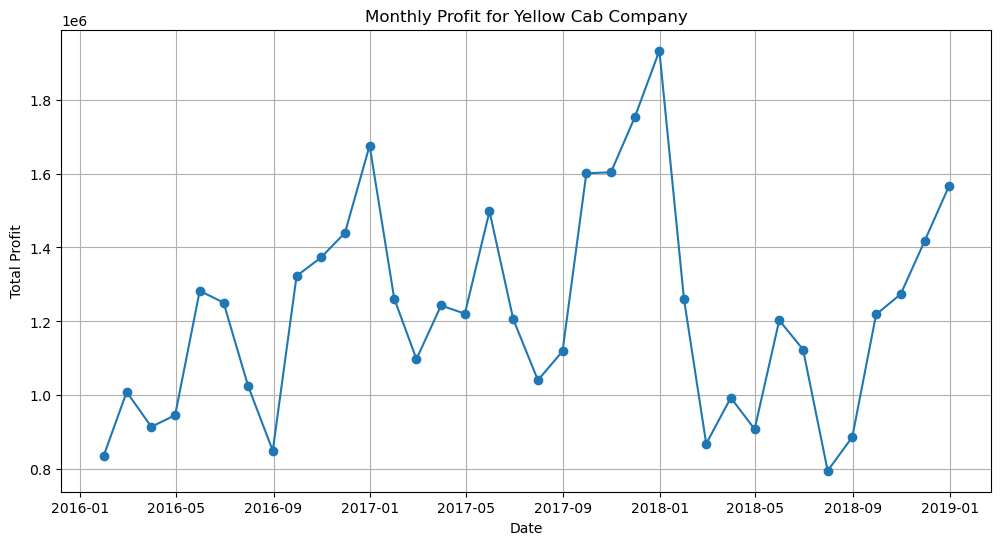

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o')
plt.title('Monthly Profit for Yellow Cab Company')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [87]:
pink_cab_df['Profit'] = pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']

C:\Users\furka\AppData\Local\Temp\ipykernel_24092\2321838454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cab_df['Profit'] = pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']


In [88]:
pink_cab_df.set_index('Date of Travel', inplace=True)


In [89]:
monthly_profit = pink_cab_df['Profit'].resample('M').sum()

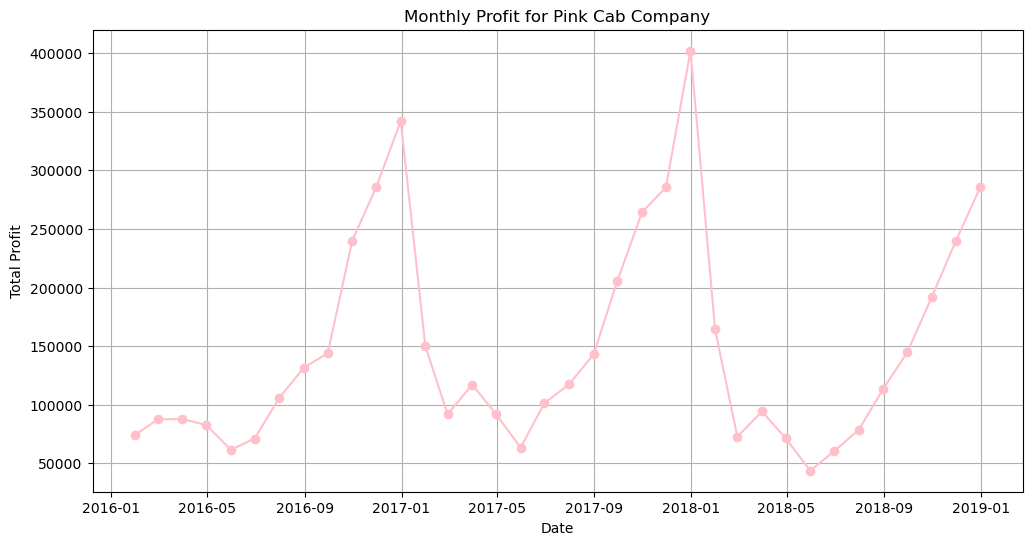

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', color='pink')
plt.title('Monthly Profit for Pink Cab Company')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [92]:
monthly_profit = yellow_cab_df['Profit'].resample('M').sum()
monthly_customers = yellow_cab_df['Customer ID'].resample('M').nunique()

In [93]:
profit_per_customer = monthly_profit / monthly_customers

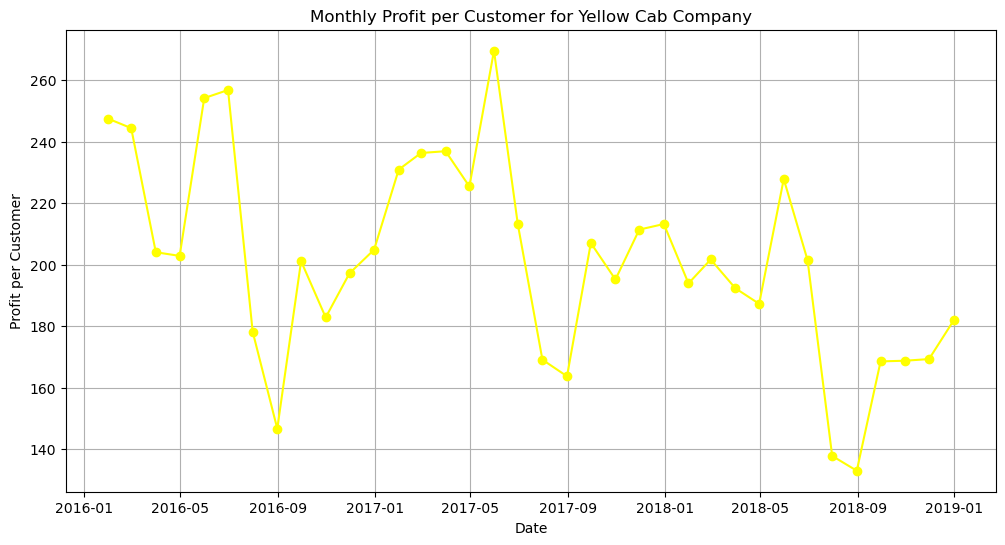

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(profit_per_customer.index, profit_per_customer.values, marker='o', color='yellow')
plt.title('Monthly Profit per Customer for Yellow Cab Company')
plt.xlabel('Date')
plt.ylabel('Profit per Customer')
plt.grid(True)
plt.show()

In [95]:
monthly_profit = pink_cab_df['Profit'].resample('M').sum()
monthly_customers = pink_cab_df['Customer ID'].resample('M').nunique()

In [96]:
profit_per_customer = monthly_profit / monthly_customers

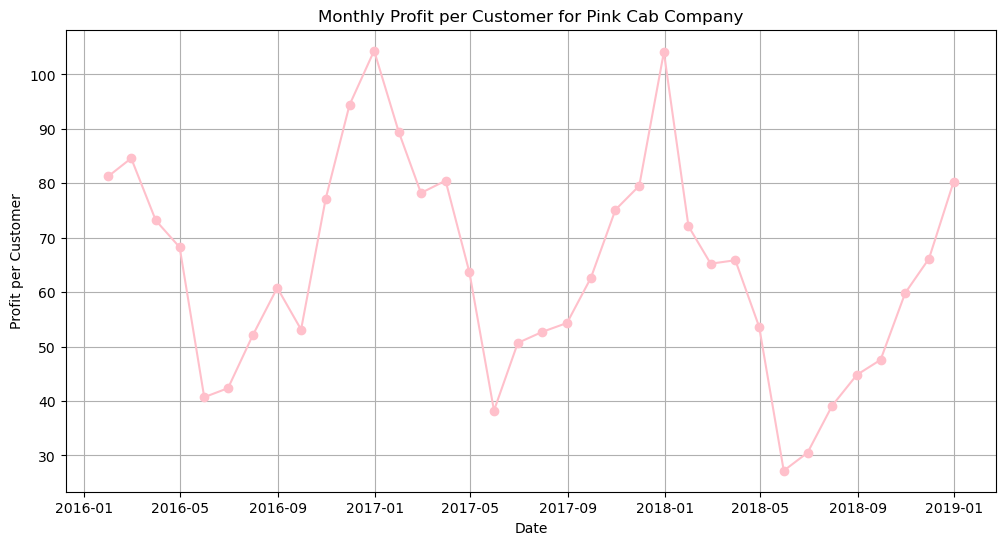

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(profit_per_customer.index, profit_per_customer.values, marker='o', color='pink')
plt.title('Monthly Profit per Customer for Pink Cab Company')
plt.xlabel('Date')
plt.ylabel('Profit per Customer')
plt.grid(True)
plt.show()

In [98]:
city_profit = yellow_cab_df.groupby('City')['Profit'].sum().sort_values(ascending=False)

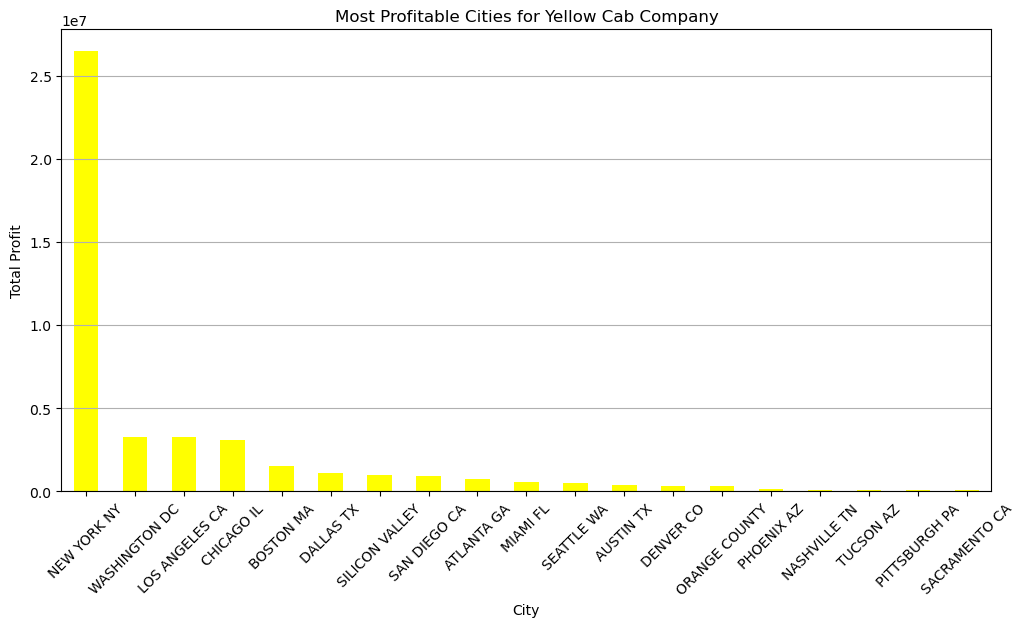

In [99]:
plt.figure(figsize=(12, 6))
city_profit.plot(kind='bar', color='yellow')
plt.title('Most Profitable Cities for Yellow Cab Company')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [100]:
city_profit = pink_cab_df.groupby('City')['Profit'].sum().sort_values(ascending=False)

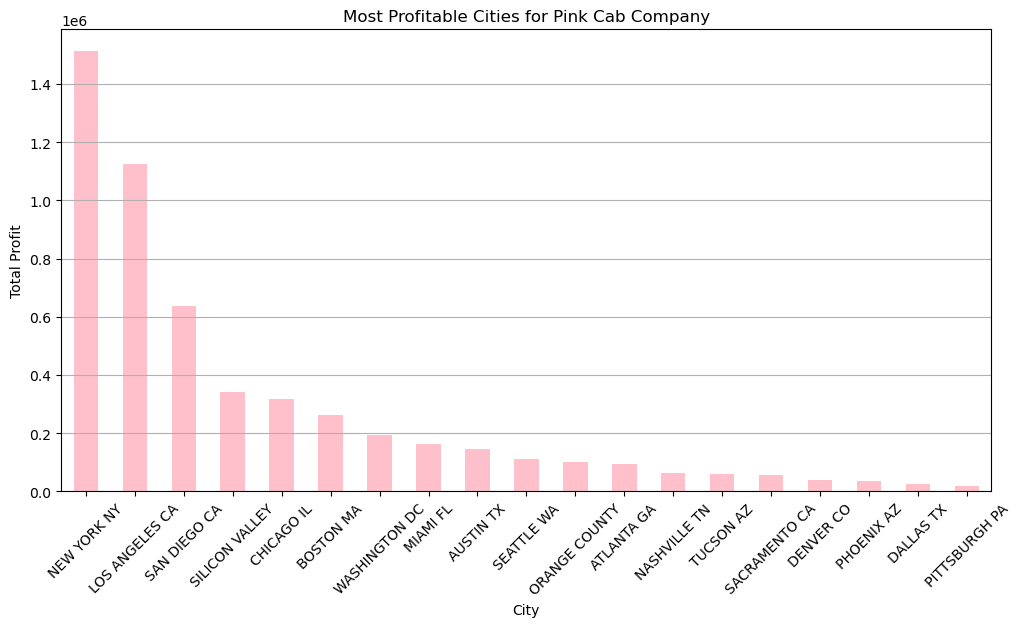

In [101]:
plt.figure(figsize=(12, 6))
city_profit.plot(kind='bar', color='pink')
plt.title('Most Profitable Cities for Pink Cab Company')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()